In [1]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install opencv-python


   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.8 MB 3.3 MB/s eta 0:00:12
   ---------------------------------------- 0.3/38.8 MB 3.9 MB/s eta 0:00:10
    --------------------------------------- 0.6/38.8 MB 4.7 MB/s eta 0:00:09
    --------------------------------------- 0.8/38.8 MB 4.8 MB/s eta 0:00:08
   - -------------------------------------- 1.1/38.8 MB 5.2 MB/s eta 0:00:08
   - -------------------------------------- 1.5/38.8 MB 5.5 MB/s eta 0:00:07
   - -------------------------------------- 1.8/38.8 MB 5.8 MB/s eta 0:00:07
   -- ------------------------------------- 2.1/38.8 MB 5.9 MB/s eta 0:00:07
   -- ------------------------------------- 2.4/38.8 MB 5.8 MB/s eta 0:00:07
   -- ------------------------------------- 2.7/38.8 MB 6.0 MB/s eta 0:00:07
   --- ------------------------------------ 3.1/38.8 MB 6.1 MB/s eta 0:00:06
   --- ------------------------------------ 3.4/38.8 MB 6.4 MB/s eta 0:00:06
   --

In [3]:
pip install matplotlib

In [4]:
pip list

Package                           Version
--------------------------------- ------------
absl-py                           2.1.0
aiobotocore                       2.7.0
aiohttp                           3.9.3
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.12
altair                            5.0.1
anaconda-anon-usage               0.4.3
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.3
anaconda-cloud-auth               0.1.4
anaconda-navigator                2.5.2
anaconda-project                  0.11.1
anyio                             4.2.0
appdirs                           1.4.4
archspec                          0.2.1
argon2-cffi                       21.3.0
argon2-cffi-bindings              21.2.0
arrow                             1.2.3
astroid                           2.14.2
astropy                           5.3.4
asttokens                         2.0.5
astunparse               

In [6]:
import tensorflow as tf
import os

In [7]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [9]:
gpus

[]

In [10]:
pip install tensorflow-gpu

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [44 lines of output]
  Traceback (most recent call last):
    File "C:\Users\vidha\anaconda3\Lib\site-packages\setuptools\_vendor\packaging\requirements.py", line 35, in __init__
      parsed = _parse_requirement(requirement_string)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\vidha\anaconda3\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 64, in parse_requirement
      return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\vidha\anaconda3\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 82, in _parse_requirement
      url, specifier, marker = _parse_requirement_details(tokenizer)
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\vidha\anaconda3\Lib\site-packages\setuptools\_v

In [11]:
import cv2
import imghdr

C:\Users\vidha\AppData\Local\Temp\ipykernel_6508\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [12]:
pip install imghdr

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement imghdr (from versions: none)
ERROR: No matching distribution found for imghdr


In [14]:
data_dir="D:\Image classification"

In [15]:
os.listdir(data_dir)

['happy', 'Sad']

In [16]:
image_exts=['jpeg','jpg','bmp','png']

In [22]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path=os.path.join(data_dir,image_class,image)
        try:
            img=cv2.imread(image_path)
            tip=imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image{}'.format(image_path))
            #os.remove(image_path)

In [19]:
import numpy as np
from matplotlib import pyplot as plt

In [40]:
data=tf.keras.utils.image_dataset_from_directory("D:\Image classification")

Found 145 files belonging to 2 classes.


In [21]:
data_iterator=data.as_numpy_iterator()

In [29]:
#Get another batch from the iterator()
batch=data_iterator.next()

In [30]:
#Images reprsented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [31]:
batch[1]

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

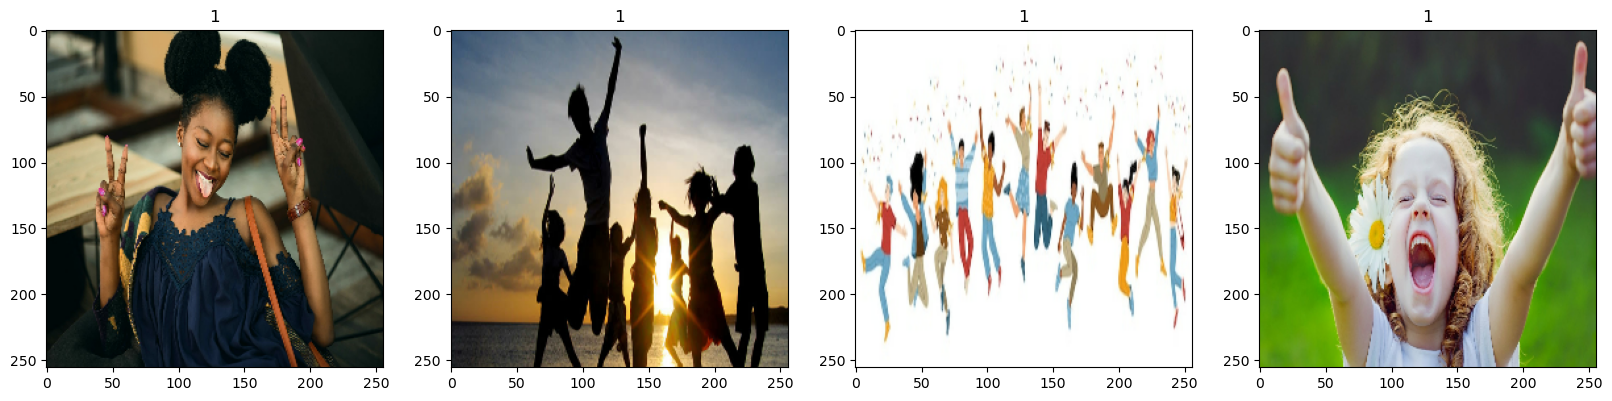

In [33]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [41]:
data=data.map(lambda x,y:(x/255,y))

In [42]:
scaled_iterator=data.as_numpy_iterator()


In [43]:
batch=scaled_iterator.next()

In [47]:
batch[0].max()

1.0

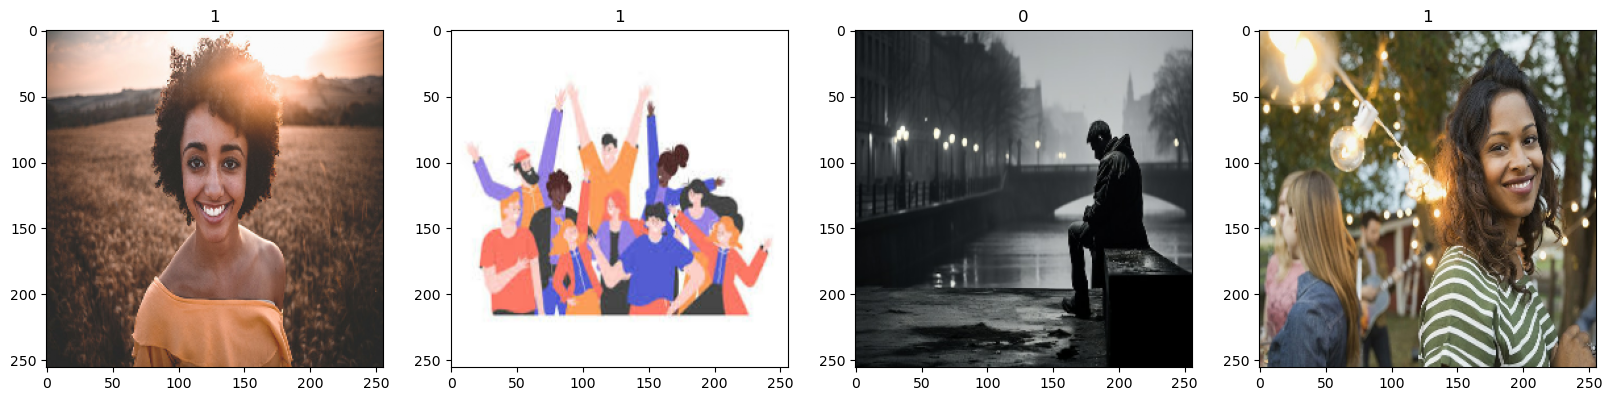

In [48]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [49]:
len(data)

5

In [57]:
train_size=int(len(data)*.7)
val_size=int(len(data)*.2)
test_size=int(len(data)*.1)+1

In [60]:
train_size

3

In [61]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [64]:
len(train)

3

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [75]:
model=Sequential()

In [76]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu',))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu',))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [77]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [78]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ Layer (type)             ┃ Output Shape      ┃   Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)        │ (None, 254, 254,  │       448 │
│                          │ 16)               │           │
├──────────────────────────┼───────────────────┼───────────┤
│ max_pooling2d_3          │ (None, 127, 127,  │         0 │
│ (MaxPooling2D)           │ 16)               │           │
├──────────────────────────┼───────────────────┼───────────┤
│ conv2d_5 (Conv2D)        │ (None, 125, 125,  │     4,640 │
│                          │ 32)               │           │
├──────────────────────────┼───────────────────┼───────────┤
│ max_pooling2d_4          │ (None, 62, 62,    │         0 │
│ (MaxPooling2D)           │ 32)               │           │
├──────────────────────────┼───────────────────┼───────────┤
│ conv2d_6 (Conv2D)        │ (None, 60, 60,    │     4,624 │
│                          │ 16)               │           │
├──────────────────────────┼───────────────────┼───────────┤
│ max_pooling2d_5          │ (None, 30, 30,    │         0 │
│ (MaxPooling2D)           │ 16)               │           │
├──────────────────────────┼───────────────────┼───────────┤
│ flatten_1 (Flatten)      │ (None, 14400)     │         0 │
├──────────────────────────┼───────────────────┼───────────┤
│ dense_2 (Dense)          │ (None, 256)       │ 3,686,656 │
├──────────────────────────┼───────────────────┼───────────┤
│ dense_3 (Dense)          │ (None, 1)         │       257 │
└──────────────────────────┴───────────────────┴───────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [79]:
logdir="D:\Image classification\log"
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [80]:
hist=model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.7539 - loss: 0.7041 - val_accuracy: 0.7812 - val_loss: 0.4160
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.8685 - loss: 0.3206 - val_accuracy: 0.8750 - val_loss: 0.3211
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 791ms/step - accuracy: 0.8229 - loss: 0.3508 - val_accuracy: 0.8750 - val_loss: 0.2862
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.8555 - loss: 0.2710 - val_accuracy: 0.8750 - val_loss: 0.2031
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.8125 - loss: 0.3271 - val_accuracy: 0.8750 - val_loss: 0.3061
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.9128 - loss: 0.2464 - val_accuracy: 0.8125 - val_loss: 0.2605
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 993ms/step - accuracy: 0.8516 - loss: 0.2393 - val_accuracy: 0.8438 - val_loss: 0.2360
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 791ms/step - accuracy: 0.9089 - loss: 0.2180 - val_accuracy: 0.9688 - val_loss: 0.1621
Epoch 

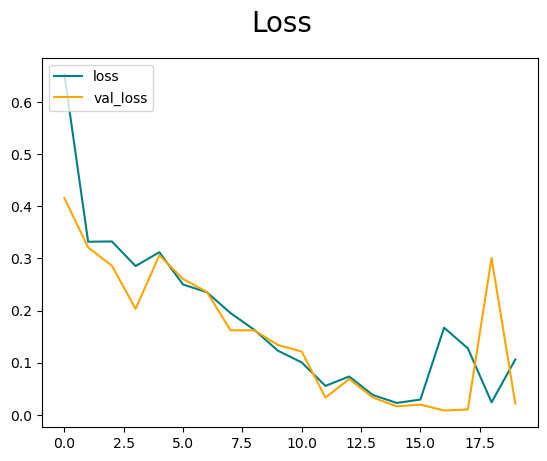

In [81]:
fig=plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()


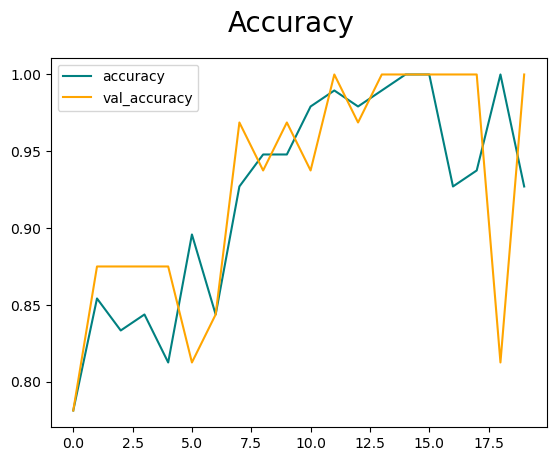

In [82]:
 fig=plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()


In [83]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [84]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()


In [86]:
for batch in test.as_numpy_iterator():
    X, y=batch
    yhat=model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
    
           

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


In [87]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()},Accuracy:{acc.result().numpy}')

Precision:1.0, Recall:1.0,Accuracy:<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=float32, numpy=1.0>>


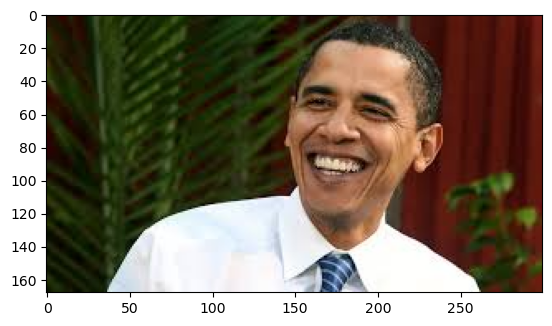

In [89]:
 img=cv2.imread("D:\Image classification\images.jpeg")
 plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
 plt.show()

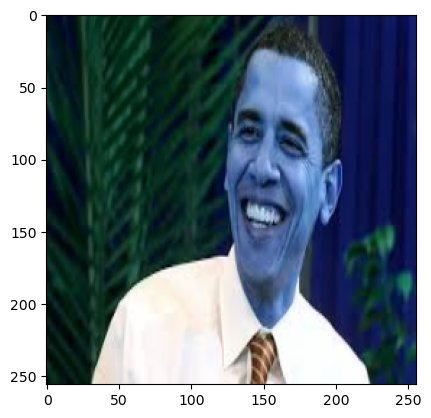

In [90]:
resize=tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [91]:
yhat=model.predict(np.expand_dims(resize/255,0))
yhat

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


array([[0.7805276]], dtype=float32)

In [92]:
if yhat > 0.5:
    print(f'Predicted class is happy')
else:
    print(f'Predicted class is Sad')

Predicted class is happy


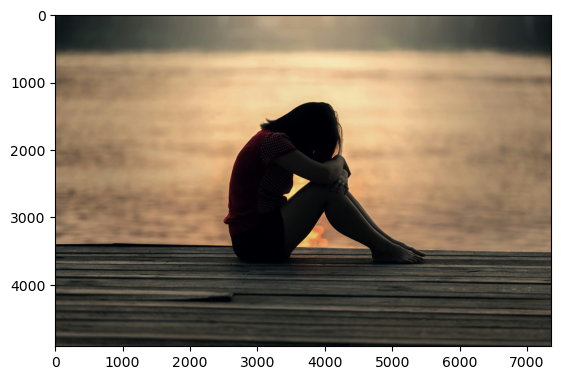

In [99]:
img=cv2.imread("D:\Image classification\Sad\pexels-photo-247314.jpeg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

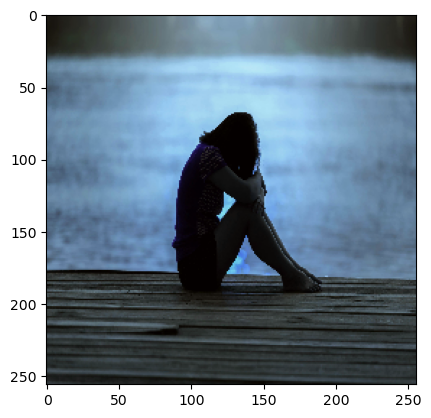

In [100]:
resize=tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [101]:
yhat=model.predict(np.expand_dims(resize/255,0))
yhat

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


array([[0.09686028]], dtype=float32)

In [102]:
if yhat > 0.5:
    print(f'Predicted class is happy')
else:
    print(f'Predicted class is Sad')

Predicted class is Sad


In [104]:
from tensorflow.keras.models import load_model

In [105]:
model.save(os.path.join('models','happysadmodel.h5'))

In [106]:
new_model=load_model(os.path.join('models','happysadmodel.h5'))

In [108]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


array([[0.09686028]], dtype=float32)

In [109]:
yhatnew=model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


In [110]:
if yhatnew > 0.5:
    print(f'Predicted class is happy')
else:
    print(f'Predicted class is Sad')

Predicted class is Sad
